In [1]:
# ! pip install matplotlib transformers datasets opencv-python h5py accelerate sckit-learn

### Importing the necessary python libraries

In [2]:
import numpy as np
import h5py
from datasets import Dataset, load_dataset
import pandas as pd
import cv2
import torch
import math
from matplotlib import pyplot as plt

import os
import shutil
import re
import glob

c:\Users\ATI-G2\Envs\trans\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sequence import ECGSequence

### defining the paths

In [8]:
hdf5_path =  r"C:\Users\ATI-G2\Documents\python\ECG\data\code-15\exams_part4.hdf5" #-- change this line
exams_csv_path = r"C:\Users\ATI-G2\Documents\python\ECG\data\code-15\exams.csv"

### Transformers and datasets using hugging faces

In [2]:
# from datasets import load_dataset
# data_root_fldr = r"C:\Users\ATI-G2\Documents\python\ECG\data\vit-data"

# data = load_dataset(data_root_fldr,split="train") 
# data



Resolving data files: 100%|██████████| 24341/24341 [00:00<00:00, 461865.65it/s]
Extracting data files: 0it [00:00, ?it/s]
Generating train split: 24341 examples [00:01, 14427.20 examples/s]                    


NonMatchingSplitsSizesError: [{'expected': SplitInfo(name='train', num_bytes=1878324, num_examples=20000, shard_lengths=None, dataset_name=None), 'recorded': SplitInfo(name='train', num_bytes=2299618, num_examples=24341, shard_lengths=None, dataset_name='vit-data')}]

### Working on extracting the labels for the generated images into a csv file

In [9]:
# pd_results.head(1)

# pd_req.info(), pd_req.describe()
# df = pd_req

# # Create a summary list of dictionaries
# summary = []

# for column in df.columns:
#     unique_counts = df[column].value_counts().to_dict()
#     summary.append({'Column': column, 'Unique_Values': unique_counts})

# # Create a summary DataFrame from the list of dictionaries
# summary_df = pd.DataFrame(summary)

# print(summary_df)


,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
exam_id,,,,,,,,,,,,,,
1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5


In [134]:
# exam_id = np.delete(np.array(f["exam_id"]),np.where(np.array(f["exam_id"])==0)).tolist()
# pd_req = pd_results.loc[exam_id,["1dAVb","RBBB","LBBB","SB","ST","AF","normal_ecg"]]
# labels_arr = pd_req.to_numpy()


Creating the folders for the classification task

In [15]:
hdf5_path =  r"C:\Users\ATI-G2\Documents\python\ECG\data\code-15\exams_part3.hdf5" #-- change this line

# with h5py.File(hdf5_path,"r") as f:

pd_results = pd.read_csv(exams_csv_path,index_col="exam_id")

file_name = re.split(r"\\", hdf5_path)[-1]

labels_list = ["1dAVb","RBBB","LBBB","SB","ST","AF","normal_ecg", "not_normal_ecg"]

pd_req = pd_results[pd_results["trace_file"]==file_name][labels_list[:-1]]
labels_arr = pd_req.to_numpy()
exam_id = pd_req.index.to_list()

dest_root_fldr = r"..\data\rough"
src_path = r"..\data\code-15\exams_part3_imgs" #--Change this line
normal_count = 0
not_normal_count = 0
disease_count = 0

shutil.rmtree(dest_root_fldr, ignore_errors = True)
os.makedirs(dest_root_fldr, exist_ok = True)

for flr in labels_list:
    os.makedirs(os.path.join(dest_root_fldr, f'{flr}'))


for i,idx in enumerate(exam_id):
    try:
        if labels_arr[i,6]==1:
            shutil.copy(os.path.join(src_path,f"{idx}.jpg"),os.path.join(dest_root_fldr, "normal_ecg"))
            normal_count += 1

        else:
            if np.count_nonzero(labels_arr[i])==0:
                shutil.copy(os.path.join(src_path,f"{idx}.jpg"), os.path.join(dest_root_fldr, "not_normal_ecg"))
                not_normal_count +=1

            else:
                clas = labels_list[np.where(labels_arr[i]==1)[0][0]]
                shutil.copy(os.path.join(src_path,f'{idx}.jpg'), os.path.join(dest_root_fldr, f"{clas}"))
                disease_count += 1

    except Exception as e:
        print(e)

print("normal count", normal_count)
print("not normal count", not_normal_count)
print("disease count", disease_count)

normal count 7670
not normal count 10133
disease count 2197


In [16]:
src = r"..\data\rough"
dest = r"..\data\vit-data\train"

for path in glob.glob(src+r"\\*\\*"):
    sub_dir = re.split(r"\\", path)[-2]
    if not "ecg" in sub_dir:
        shutil.copy(path, os.path.join(dest, sub_dir))





### Verifying the exam_id from the hdf5 and the csv file

In [152]:
# pd = pd_results[pd_results["trace_file"]=="exams_part0.hdf5"]
# exam_id_csv = pd.index.to_list()

In [149]:
# exam_id_hdf5 = np.delete(np.array(f["exam_id"]),np.where(np.array(f["exam_id"])==0)).tolist()

In [153]:
# exam_id_csv.sort()
# exam_id_hdf5.sort()

In [147]:
# exam_id_csv

In [158]:
# import csv
# with open("verify.csv", "w", newline='') as f:
#     writer = csv.writer(f)

#     for i, j in zip(exam_id_csv, exam_id_hdf5):
#         writer.writerow([i, j])

# print("written the csv file")    

written the csv file


# wfdb

In [1]:
!pip install wfdb

  Obtaining dependency information for wfdb from https://files.pythonhosted.org/packages/ce/00/b83d0bd64384455dbc1f8eccb7b5d6dac23728515a9d4d74aa4def6c6fe4/wfdb-4.1.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.0 MB 1.8 MB/s eta 0:00:01
     ---------- ----------------------------- 0.3/1.0 MB 2.3 MB/s eta 0:00:01
     --------------- ------------------------ 0.4/1.0 MB 2.8 MB/s eta 0:00:01
     -------------------- ------------------- 0.5/1.0 MB 2.7 MB/s eta 0:00:01
     ---------------------- ----------------- 0.6/1.0 MB 2.2 MB/s eta 0:00:01
     ------------------------ --------------- 0.6/1.0 MB 2.2 MB/s eta 0:00:01
     --------------------------- ------------ 0.7/1.0 MB 2.1 MB/s eta 0:00:01
     ------------------------------ --------- 0.8/1.0 MB 2.0 MB/s eta 0:00:01
     ---------------------------------- -

In [2]:
!pip install pyECG

^C


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/94.9 kB ? eta -:--:--
     ---------------------------------------- 94.9/94.9 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for pytest from https://files.pythonhosted.org/packages/33/b2/741130cbcf2bbfa852ed95a60dc311c9e232c7ed25bac3d9b8880a8df4ae/pytest-7.4.0-py3-none-any.whl.

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [4]:
!pip install wfdb

In [ ]:
import wfdb
record = wfdb.rdheader(r"C:\Users\ATI-G2\Documents\python\ECG\data\code-15\12-lead\WFDBRecords\01\010\JS00001")
display(record.__dict__)

In [37]:
signal, fields = wfdb.rdsamp(r"C:\Users\ATI-G2\Documents\python\ECG\data\code-15\12-lead\WFDBRecords\01\010\JS00002")

In [32]:
fields.keys()

dict_keys(['fs', 'sig_len', 'n_sig', 'base_date', 'base_time', 'units', 'sig_name', 'comments'])

In [38]:
fields["comments"]

['Age: 59',
 'Sex: Female',
 'Dx: 426177001,164934002',
 'Rx: Unknown',
 'Hx: Unknown',
 'Sx: Unknown']

In [23]:
from matplotlib import pyplot as plt
import numpy as np

In [27]:
signal = signal[:3000,:]
signal.T.shape

(12, 3000)

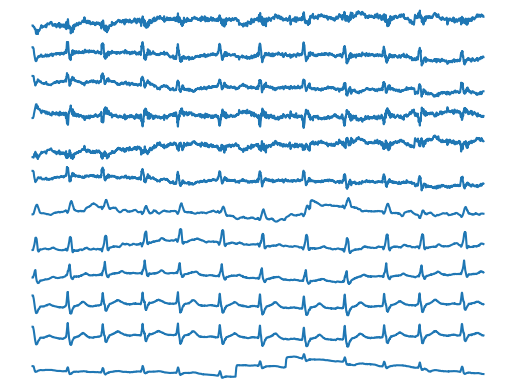

In [28]:
data = signal
for i, signal in enumerate(data.T):
    plt.subplot(12,1,i+1)
    plt.plot(np.arange(0,3000), signal)

    # Turn off spines and axis ticks
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().tick_params(axis='both', which='both', length=0)

    # Remove numbers along x and y-axes
    plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
    plt.gca().yaxis.set_major_formatter(plt.NullFormatter())


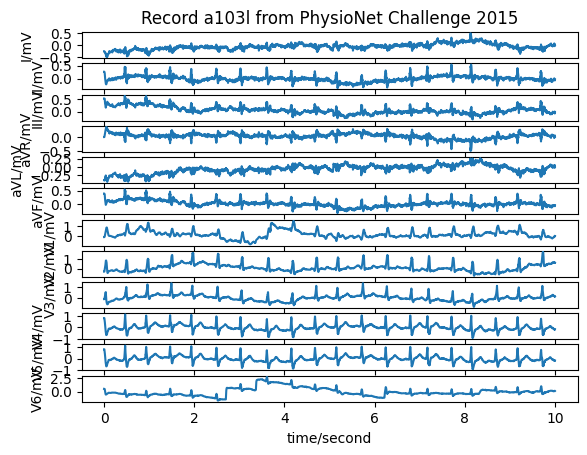

In [13]:
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015' ) 

# converting wfdb to hdf5

In [2]:
import h5py
import numpy as np
import glob
import wfdb

In [20]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ATI-G2\Documents\python\ECG\12-lead_labels.csv")

In [10]:
df.columns

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18',
       '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27',
       '0.28', '0.29', '0.30', '0.31', '0.32', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.43', '0.44', '0.45',
       '0.46', '0.47', '0.48', '0.49', '0.50', '0.51', '0.52', '0.53', '0.54',
       '0.55', '0.56', '0.57', '0.58', '0.59', '0.60', '0.61', '0.62'],
      dtype='object')

In [22]:
empt= {}
tmp = 0
for col in df.columns:
    x = df[f"{col}"].value_counts().to_dict()
    empt[f"{col}"]= x
    tmp += x["1"]

print(tmp)

print(empt)

KeyError: 1